# Problem: Variable Selection
Suppose we have data ${x_i, y_i}$ where $i = 1, …, m$ and $x_i ϵ R^p$ corresponds to $p$ features.

2.1 Write down the optimisation problem we solve with Ridge Regression and Lasso. Make sure you explain your notations: which are the decision variables, and which are data.

2.2 Explain (to a non-technical audience) what is the difference between Lasso and Ridge regression. We need Lasso for what setting?

2.3 Explain how to tune the regularization parameters for Lasso and Ridge regression (hint: CV).


Linear regression is one of the most widely used statistical methods for data analysts. 

One of the most common issues with the ordinary linear regression (OLS) method is "overfitting" data with too much noise and correlated variables specially when $p > m$. 

Regularisation is a method for solving problems of models overfitting data. Ridge and Lasso Regression are two methods used to create a better and more accurate model. 


### Ordinary Linear Model:
$$
X^T = \left( x_1, x_2, ..., x_p\right)  \\
\hat{Y} = f(x) =  \beta_{0} + \sum_{j=1}^{p} x_j \beta_j
$$

Typically we have a set of training data $\{x_1, y_1\} \cdots \{x_m , y_m\}$ from which to estimate the parameters $\beta$. 

Each $x_i = (x_{i1} , x_{i2} , \cdots , x_{ip})^T$ is a vector of features (variables) for the $i$th case. The most popular estimation method is *least squares*, in which we pick the coefficients $\beta = (\beta_0 , \beta_1 , \cdots, \beta_p )^T$ to minimize the residual sum of squares:

#### Residual sum of squares (RSS) as objective function to minimise:
$$
RSS(\beta) = \sum_{i=1}^{m} {\left(y_i - \hat{y_i} \right)^2} \\
\\
RSS(\beta) = \frac{1}{2}\sum_{i=1}^{m} {\left(y_i - \left( \beta_0 +  \sum_{j=1}^{p} x_{ij} \beta_j  \right)\right)^2}
$$

$m$ represents the number of observations.

$p$ denotes the number of variables (features) that are available in the dataset.

$x_{ij}$ represents the value of the $j$th variable (feature) for the $i$th observation, where $i = 1, 2, \cdots, m$ and $j = 1, 2, \cdots, p$.



### The closed from solution of linear regression:
$$
\hat{\beta} = (X^TX)^{-1}X^TY \\
\hat{Y} = X \hat{\beta} + \epsilon
$$

where, $X^T = \left( x_1, x_2, ..., x_p\right)$ is input vector of variables for predicting real-valued output of $\hat{Y}$. $\hat{\beta}$ is the vector of $\beta_j$ as unknown parameters or coefficients. The $\epsilon$  is prediction error.

## Shirinkage methods for variable selection:

Shrinkage allows us to focus on the strongest predictors in the dataset. Some methos are ridge regression, lasso regression, PCA and ...


### Ridge Regression
Ridge regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalised RSS. 
$$
\DeclareMathOperator*{\argmin}{argmin}
\DeclareMathOperator*{\ridge}{ridge}
\hat{\beta}_{\ridge} = \argmin_{\beta} \left\{ \sum_{i=1}^{m} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \beta_{i}^{2}   \right\}
$$

Here $\lambda \ge 0$ is a complexity parameter that controls the amount of shrinkage. The large value of $\lambda$ results in greater shrinkage.

$$
\hat{\beta} = (X^TX - \lambda I)^{-1}X^TY
$$

### Lasso Regression
The lasso is a shrinkage method like ridge, with an important differences.

$$
\DeclareMathOperator*{\argmin}{argmin}
\DeclareMathOperator*{\lasso}{lasso}
\hat{\beta}_{\lasso} = \argmin_{\beta} \left\{ \sum_{i=1}^{m} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \left|\beta_{i}\right|   \right\}
$$


## Ridge vs Lasso


1. Both ridge and lasso methos helps to ovecome overfitting data as a regularisation method.


2. Ridge uses $L_2$ penalty of $\sum_{1}^{p} \beta_{j}^{2}$ while Lasso utilises $L_1$ penalty of $\sum_{1}^{p} |\beta_{j}|$. This subtle change imposes nonlinear solution for Lasso with no closed form experssion.


3. The lasso method shrinks $\beta$ coefficients to zero aggressively. Thus it displays efficient preformance in feature reduction especially in the case of $p \gt m$.


4. lasso and ridge performs quite differently when there are correlated variables. Ridge treats the correlated variables as usual (ie. it shrinks their coefficients similarly), while lasso collapses some of the correlated parameters to zero. In other words, lasso drops the co-linear predictors from the fit. This is an important point to consider.



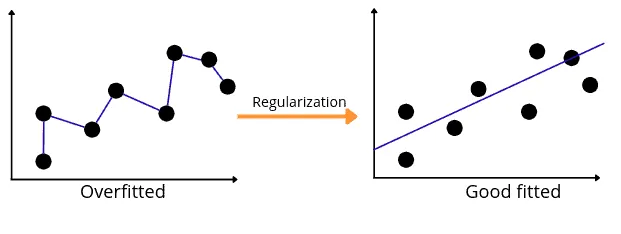

In [1]:
from IPython.display import Image
Image("regularisation.png")

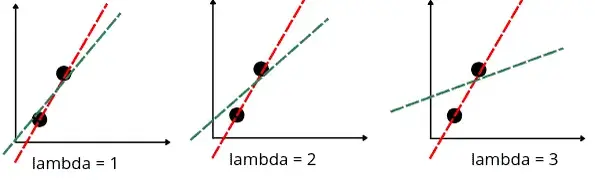

In [2]:
Image("lambda_effect.png")

$$
\DeclareMathOperator*{\slope}{slope}
y = \slope \,  x + \lambda \, {\slope}^2 \\
y = \slope \,  x + \lambda \, |\slope|
$$

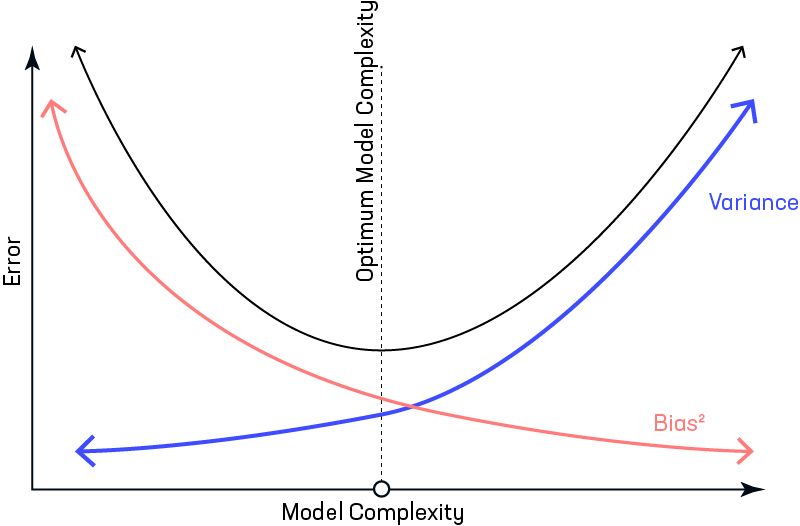

In [3]:
Image("variance-bias-tradeoff.jpg")

$$
\DeclareMathOperator*{\MSE}{MSE}
\DeclareMathOperator*{\Err}{Err}
\DeclareMathOperator*{\Bias}{Bias}
\DeclareMathOperator*{\Variance}{Variance}
Estimation: E[y|X] = X \hat{\beta} \\
\MSE = \left( E[(X \hat{\beta})^2] - E[X \hat{\beta}]^2 \right) + \left(E [X \hat{\beta}] - X \beta  \right)^2  \\ 
$$
<h1><center>Err = Irreducable Error + Variance + Bias<sup>2</sup></center></h1>

### Cross-Validation

The cross-validation is the simplest and most widely used method for estimating prediction error. This method directly estimates the average generalisation error. 

In K-fold CV, we set aside a validation set and use it to assess the performance of our prediction model. K-fold cross-validation uses part of the available data to fit the model and a different part to test it with spliting the data into K equal-sized parts. for example, when K = 5, the scenario looks like this:

$$
\begin{array}{ccccc}
\text { 1 } & \text { 2 } & \text { 3 } & \text { 4 } & \text { 5 } \\
\hline \\
\text{Train}  & \text{Train} & \color{red}{Validation} & \text{Train} & \text{Train} \\
\\
\hline
\end{array}
$$


For the $k$th part (third above), we fit the model to the other $K − 1$ parts of the data and calculate the prediction error of the fitted model when predicting the kth part of the data. We do this for $k = 1, 2, \cdots, K$ and combine the $K$ estimates of prediction error.

$$
\DeclareMathOperator*{\CV}{CV}
\CV(\hat{f}) = \frac{1}{m} \sum_{i=1}^{m} L\left( y_i - \hat{f}_{-k(i)}(x_i )\right)
$$

Refrence: "The Elements of Statistical Learning 2nd Ed" by T. Hastie, R. Tibshirani and H Friedman;(Spring 2013).


# Ridge and Lasso Regressions 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, get_scorer
from sklearn.linear_model import ElasticNetCV, lasso_path, enet_path

%matplotlib inline
sns.set_theme()

I use the `sklearn` package in order to perform ridge regression and the lasso. The main functions in this package that we care about are `Ridge()`, which can be used to fit ridge regression models, and `Lasso()` which will fit lasso models. They also have cross-validated counterparts: `RidgeCV()` and `LassoCV()`. 

### Data

I use the data frame called “Hitters” with 20 variables and 322 observations of US major league players (see this [link](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf) for more information about the data). 
The baseball player’s salary is the subject of prediction on the basis of various statistics associated with performance in the previous year.

In [5]:
df = pd.read_csv('Hitters.csv').dropna()
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

The ridge and lasso regressions to predict `Salary` on the `Hitters` data.

In [6]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [7]:
sc = StandardScaler()
mms = MinMaxScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)
X_scaled

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,1.221499,-0.523191,0.213352,1.058758,0.981166,1.075052
1,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,2.109109,-0.253863,0.819964,-0.944503,0.981166,-0.930187
2,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-0.324661,-0.744179,-0.848219,1.058758,-1.019196,1.075052
3,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,1.840678,-0.543909,-0.696566,1.058758,-1.019196,1.075052
4,1.294712,1.358167,-0.871783,0.755349,-0.018840,-0.282057,0.770868,0.766993,0.634985,-0.612370,0.422846,0.017294,-0.251434,-0.031177,2.087225,2.488147,-0.944503,0.981166,-0.930187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.634968,0.425651,-0.528551,0.402286,-0.134968,-0.189792,-0.483183,0.019917,0.129549,-0.453913,0.053785,-0.060165,-0.463914,0.122723,-0.757991,-0.848219,1.058758,-1.019196,1.075052
259,0.600961,0.625476,-0.757373,0.833807,-0.057549,2.439756,0.979876,1.250292,1.219250,-0.368590,1.620783,0.373605,2.332483,0.079774,1.810990,1.729882,-0.944503,-1.019196,-0.930187
260,0.485336,0.403449,-0.986194,0.245369,-0.328515,0.502194,-0.274175,-0.419565,-0.446988,-0.758638,-0.436281,-0.735605,-0.433560,-0.908051,-0.039781,-0.241607,-0.944503,0.981166,-0.930187
261,1.151881,0.803098,-0.299730,1.186870,0.329546,1.701637,0.143842,0.236810,0.208378,0.338372,0.329068,0.277556,0.272180,3.662427,0.084525,0.516658,-0.944503,-1.019196,-0.930187


## Ridge Regression

The `Ridge()` function has an alpha argument (the same as $\lambda$) that is used to tune the model. 
Here, I generate an array of lambda values ranging from very small to very big:

In [8]:
lambdas = 10**np.linspace(-2,7,100)
lambdas.shape

(100,)

In [9]:
ridge = Ridge()
coefs = []

for l in lambdas:
    ridge.set_params(alpha = l)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 19)

Text(0.5, 1.0, 'Ridge coefficients (weights) as a function of the regularisation ($\\lambda$)')

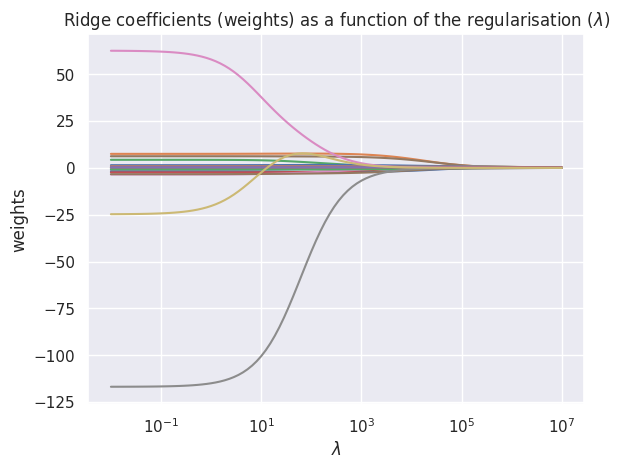

In [10]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('weights')
plt.title('Ridge coefficients (weights) as a function of the regularisation ($\lambda$)')

To estimate the test error of ridge and lasso regressions, data should split into a training set and a test set:

In [11]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=99)

Fitting a ridge regression model on the training set and evaluate its MSE on the test set using different $\lambda$s:

In [12]:
ridge1 = Ridge(alpha = 0.1)
ridge1.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge1.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge1.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))   

AtBat           -0.917442
Hits             2.945034
HmRun            9.723522
Runs            -1.845576
RBI             -0.270825
Walks            2.048393
Years          -11.534011
CAtBat          -0.369517
CHits            0.765641
CHmRun          -0.795135
CRuns            1.716952
CRBI             0.752130
CWalks          -0.569914
PutOuts          0.261654
Assists          0.557804
Errors         -10.674978
League_N       173.063410
Division_W     -71.510909
NewLeague_N    -61.994637
dtype: float64
129670.09748942273


In [13]:
ridge2 = Ridge(alpha = 2000) 
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

AtBat         -0.972534
Hits           2.345141
HmRun          3.350733
Runs          -0.355299
RBI            1.019732
Walks          1.849632
Years         -1.908557
CAtBat        -0.436854
CHits          1.019373
CHmRun        -0.419756
CRuns          1.531354
CRBI           0.618050
CWalks        -0.436228
PutOuts        0.253569
Assists        0.328993
Errors        -4.262135
League_N       2.056567
Division_W    -1.207226
NewLeague_N    1.377552
dtype: float64
124794.73112432039


This big penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. This over-shrinking makes the model more biased, resulting in a higher MSE.

Let's check least squares regression that is simply ridge regression with $\lambda=0$.

In [14]:
ols = Ridge(alpha = 0)
ols.fit(X_train, y_train)       
pred = ols.predict(X_test)   
print(pd.Series(ols.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

AtBat           -0.915955
Hits             2.943250
HmRun            9.735643
Runs            -1.850213
RBI             -0.273115
Walks            2.050669
Years          -11.507138
CAtBat          -0.369777
CHits            0.765907
CHmRun          -0.794408
CRuns            1.719077
CRBI             0.751588
CWalks          -0.571077
PutOuts          0.261721
Assists          0.558179
Errors         -10.683835
League_N       175.250637
Division_W     -71.656382
NewLeague_N    -63.981409
dtype: float64
129727.41106903533


It looks like we are indeed improving over regular least-squares!

The cross-validation can find the tuning parameter lambda. The CV ridge regression function, `RidgeCV()` performs generalized cross-validation the Kfold can be selected throug argument `cv`.

In [15]:
ridgecv = RidgeCV(alphas = lambdas, cv=10, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)

print('Best lambda: ',ridgecv.alpha_)

Best lambda:  231012.97000831628


In [16]:
ridge4 = Ridge(alpha = ridgecv.alpha_) 
ridge4.fit(X_train, y_train)
print('MSE of the best lambda: ', mean_squared_error(y_test, ridge4.predict(X_test))) # Calculate the test MSE

MSE of the best lambda:  130958.91567795293


Refitting the ridge regression model on the full data set using the best lambda from cross-validation to get the coefficients.

In [17]:
ridge4.fit(X, y)
pd.DataFrame(ridge4.coef_, index=X.columns, columns=['Ridge: $ \\beta $'])

,Ridge: $ \beta $
AtBat,0.086255
Hits,0.807970
HmRun,0.019041
Runs,0.447458
RBI,0.239388
Walks,0.754078
Years,-0.005589
CAtBat,-0.339473
CHits,0.859619
CHmRun,0.163488


As expected, none of the coefficients are exactly zero - ridge regression does not
perform variable selection!

##  Lasso Regression:

In order to fit a lasso model, I'll use the `Lasso()` function. 

In [18]:
lambdas = 10**np.linspace(-2,3,200)
lambdas.shape

(200,)

Text(0.5, 1.0, 'Lasso coefficients (weights) as a function of the regularisation ($\\lambda$)')

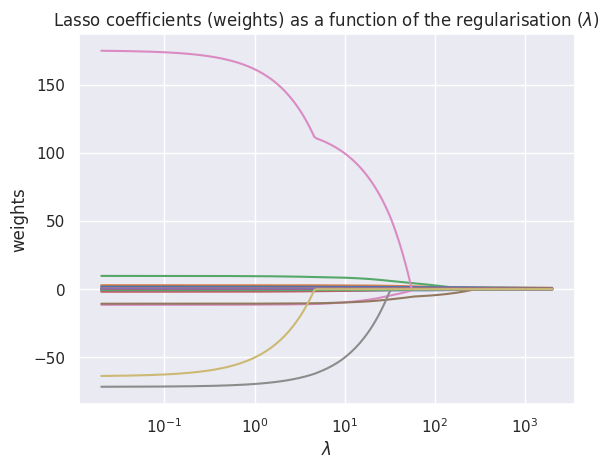

In [19]:
lasso = Lasso(max_iter = 10000) # , normalize = True
coefs = []

for l in lambdas:
    lasso.set_params(alpha=l)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('weights')
plt.title('Lasso coefficients (weights) as a function of the regularisation ($\lambda$)')

Notice some of the coefficients are exactly equal to zero. 
Now, I perform 10-fold cross-validation to choose the best lambda, refit the model and compute the associated test error:

In [20]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000) 
lassocv.fit(X_train, y_train)

print(lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))


839.5496826182327
134730.28908556816


In [21]:
# Some of the coefficients are now reduced to exactly zero.
pd.DataFrame(lasso.coef_, index=X.columns, columns=['Lasso: $ \\beta $'])

,Lasso: $ \beta $
AtBat,0.137601
Hits,0.000000
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,0.000000
Years,-0.000000
CAtBat,-0.415277
CHits,1.176683
CHmRun,0.000000


In [22]:
def regmodel_param_plot(
    validation_score, train_score, alphas_to_try, chosen_alpha,
    scoring, model_name, test_score = None, filename = None):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = validation_score, x = alphas_to_try, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = alphas_to_try, 
                 label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    if test_score is not None:
        sns.lineplot(y = test_score, x = alphas_to_try, 
                     label = 'test_data')
    plt.xlabel('$\lambda$')
    plt.ylabel(scoring)
    plt.title(model_name + ' Regularisation')
    plt.legend()
    if filename is not None:
        plt.savefig(str(filename) + ".png")
    plt.show()

In [23]:
def regmodel_param_test(
    alphas_to_try, X, y, cv, scoring = 'r2', 
    model_name = 'Lasso', X_test = None, y_test = None, 
    draw_plot = False, filename = None):
    
    validation_scores = []
    train_scores = []
    results_list = []
    if X_test is not None:
        test_scores = []
        scorer = get_scorer(scoring)
    else:
        test_scores = None

    for curr_alpha in alphas_to_try:
        
        if model_name == 'Lasso':
            regmodel = Lasso(alpha = curr_alpha, max_iter=10000)
        elif model_name == 'Ridge':
            regmodel = Ridge(alpha = curr_alpha, max_iter=10000)
        else:
            return None

        results = cross_validate(
            regmodel, X, y, scoring=scoring, cv=cv, 
            return_train_score = True)

        validation_scores.append(np.mean(results['test_score']))
        train_scores.append(np.mean(results['train_score']))
        results_list.append(results)

        if X_test is not None:
            regmodel.fit(X,y)
            y_pred = regmodel.predict(X_test)
            test_scores.append(scorer(regmodel, X_test, y_test))
    
    chosen_alpha_id = np.argmax(validation_scores)
    chosen_alpha = alphas_to_try[chosen_alpha_id]
    max_validation_score = np.max(validation_scores)
    if X_test is not None:
        test_score_at_chosen_alpha = test_scores[chosen_alpha_id]
    else:
        test_score_at_chosen_alpha = None
        
    if draw_plot:
        regmodel_param_plot(
            validation_scores, train_scores, alphas_to_try, chosen_alpha, 
            scoring, model_name, test_scores, filename)
    
    return chosen_alpha, max_validation_score, test_score_at_chosen_alpha

In [24]:
cv = KFold(n_splits=5, shuffle=True, random_state=101)
lamdas = 10**np.linspace(-2,4,100) #lambdas


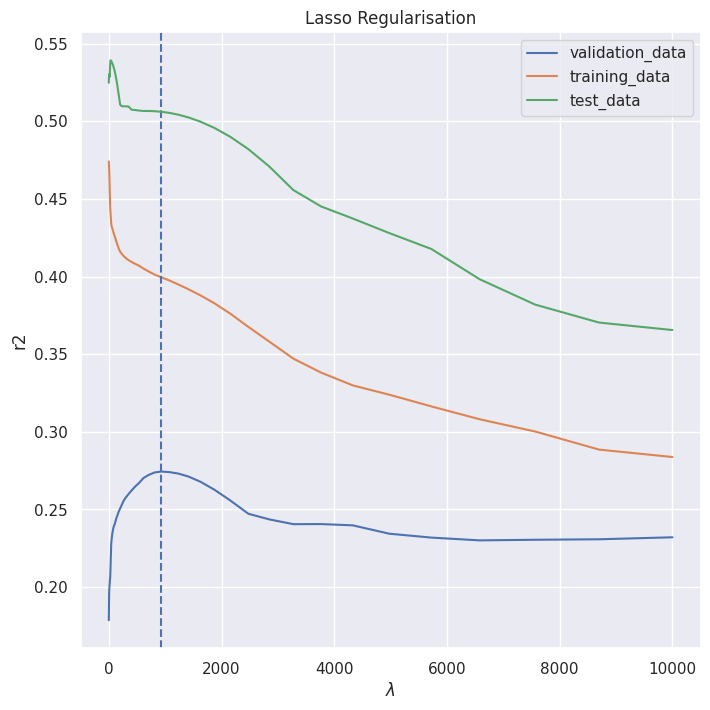

In [25]:
chosen_alpha, max_validation_score, test_score_at_chosen_alpha = regmodel_param_test(
    lamdas, X_train, y_train, cv, scoring = 'r2', model_name = 'Lasso', 
    X_test = X_test, y_test = y_test, draw_plot = True, filename = 'lasso_wide_search')


In [26]:
cv = KFold(n_splits=5, shuffle=True, random_state=101)
lamdas = 10**np.linspace(-2,6,100) #lambdas


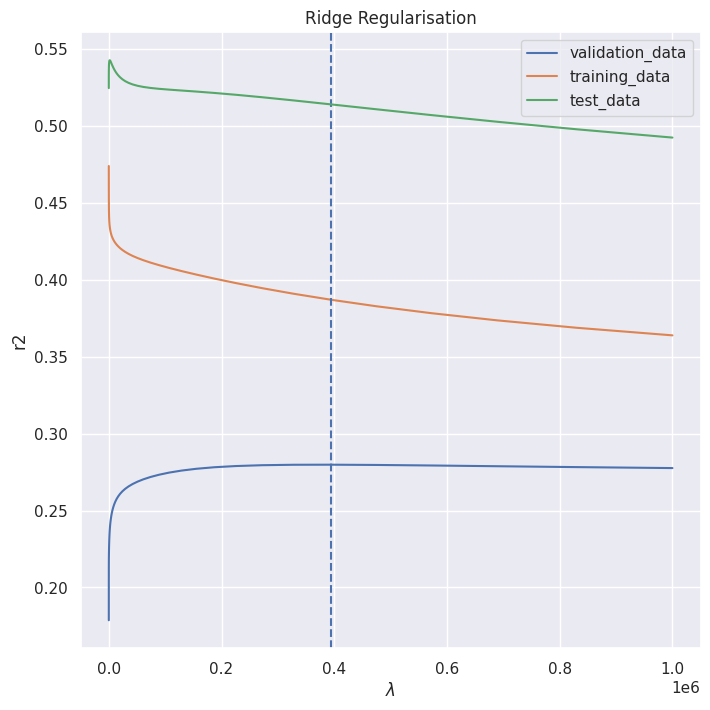

In [27]:
chosen_alpha, max_validation_score, test_score_at_chosen_alpha = regmodel_param_test(
    lamdas, X_train, y_train, cv, scoring = 'r2', model_name = 'Ridge', 
    X_test = X_test, y_test = y_test, draw_plot = True, filename = 'ridge_wide_search')
